In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')
from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

In [218]:
X =np.load('C:\\Users\\gazur\\Desktop\\Related Content\\M-Model(dataset/X.npy')
y =np.load('C:\\Users\\gazur\\Desktop\\Related Content\\M-Model(dataset/y.npy')

X = np.concatenate((X[204:409], X[822:1027] ), axis=0) # from 0 to 204 is zero sign and from 205 to 410 is one sign 
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


In [219]:
# plt.imshow(X[203])

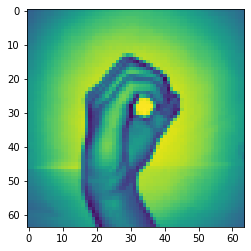

In [220]:
plt.imshow(X[90].reshape(64,64))

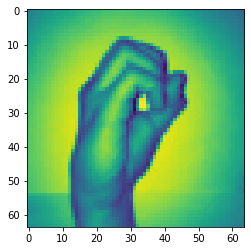

In [221]:
plt.imshow(X[21].reshape(64,64))

In [222]:
X.shape    #410 image and high with width

(410, 64, 64)

In [223]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
# number_of_train = X_train.shape[0]
# number_of_test = X_test.shape[0]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

In [224]:
Y_test.shape

(62, 1)

In [225]:
# X_train.shape #after tran test split

In [226]:
# X_test.shape

In [227]:
# X_train[1] #its represent the whole value but X_train.shape[1] represent the num of value

* Now we have train_X is three(3D) dimension and test is two(2D) dimension. So need to make X_train to flatten(2D)

In [228]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


Now lets make the transport for each pixel convert into row and colomn as image number. Because we work with each pixel not image.

In [229]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


##### What we did up to this point:

* Choose our labels (classes) that are sign zero and sign one
* Create and flatten train and test sets

Lets apply model:
* Logistic Regression
* Simple deep learning Model

In [196]:
#haphazar code
# def dummy(parameter):
#     dummyparameter = parameter + 5
#     return dummyparameter
# result = dummy(3)
# # 
# def initialize_weights_and_bias(dimension):
#     w=np.full((dimension,1), 0.01)
#     b=0.0
#     return w,b

# # initialized_weight_and_bias(112)
# # print(initialized_weight_and_bias)

def dummy(parameter):
    dummy_parameter = parameter + 5
    return dummy_parameter
result = dummy(3)     # result = 8

# lets initialize parameters
# So what we need is dimension 4096 that is number of pixels as a parameter for our initialize method(def)
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

Weight and bias initialised done now lets moving to :
* Forward propagation

The all steps from pixels to cost is called forward propagation
* z = (w.T)x + b => in this equation we know x that is pixel array, we know w (weights) and b (bias) so the rest is calculation. (T is transpose)
* Then we put z into sigmoid function that returns y_head(probability). When your mind is confused go and look at computation graph. Also equation of sigmoid function is in computation graph.
* Then we calculate loss(error) function.
* Cost function is summation of all loss(error).
* Lets start with z and the write sigmoid definition(method) that takes z as input parameter and returns y_head(probability)
****


In [197]:
# define sigmoid function
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

y_head = sigmoid(0)
y_head

0.5

Now all going good and lets jump to the loss function. Loss function is define your prediction. If your error is big then prediction is not right.
* After that, the cost function is summation of loss function. Each image creates loss function. Cost function is summation of loss functions that is created by each input image

In [198]:
# a=np.log(3)  
# a   #calculate the natural logarithm

In [199]:
# Forward propagation stes
# find z = w.T*X+b
# y_head=sigmoid(z)
# loss(error)=loss(y,y_head)
# cost= sum(loss)

def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b    #dot return the dot product of each value
    y_head=sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost=(np.sum(loss))/x_train.shape[1]  #x_train.shape[1] use for scalling
    
    return cost

Well, now we know what is our cost that is error.
* Therefore, we need to decrease cost because as we know if cost is high it means that we make wrong prediction.
*****
* Lets think first step, every thing starts with initializing weights and bias. Therefore cost is dependent with them.
* In order to decrease cost, we need to update weights and bias.
*********
* In other words, our model needs to learn the parameters weights and bias that minimize cost function. This technique is called gradient descent.
*****
* Everything looks like good but how we find slope? If you remember from high school or university, in order to find slope of function(cost function) at given point(at given weight) we take derivative of function at given point. Also you can ask that okey well we find slope but how it knows where it go. You can say that it can go more higher cost values instead of going minimum point. The asnwer is that slope(derivative) gives both step and direction of step. Therefore do not worry :)

* Update equation is this. It says that there is a cost function(takes weight and bias). Take derivative of cost function according to weight and bias. Then multiply it with α learning rate. Then update weight. (In order to explain I ignore bias but these all steps will be applied for bias)
   
                 W1 = W0-a(dj(w,b)/d(w,b)
                 
   *****
* Now, I am sure you are asking what is learning rate that I mentioned never. It is very simple term that determines learning rate. Hovewer there is tradeoff between learning fast and never learning. For example you are at Paris(current cost) and want to go Madrid(minimum cost). If your speed(learning rate) is small, you can go Madrid very slowly and it takes too long time. On ther other hand, if your speed(learning rate) is big, you can go very fast but maybe you make crash and never go to Madrid. Therefore, we need to choose wisely our speed(learning rate).
* Learning rate is also called hyperparameter that need to be chosen and tuned. I will explain it more detailed in artificial neural network with other hyperparameters. For now just say learning rate is 1 for our previous example.
    ***
    I think now you understand the logic behind forward propagation(from weights and bias to cost) and backward propagation(from cost to weights and bias to update them). Also you learn gradient descent.
    ***
 Before implementing the code you need to learn one more thing that is how we take derivative of cost function according to weights and bias. It is not related with python or coding. It is pure mathematic. There are two option first one is to google how to take derivative of log loss function and second one is even to google what is derivative of log loss function :) I choose second one because I cannot explain math without talking :)

In [200]:
# In backward propagation we will use y_head that found in forward progation
# Therefore instead of writing backward propagation method, lets combine forward propagation and backward propagation

def forward_backward_propagation(w,b,x_train,y_train):
    #forward propagation
    z=np.dot(w.T,x_train) + b
    y_head =sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    
    #back_propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients= {"derivative_weight": derivative_weight, "derivative_bias":derivative_bias}
    
    return cost, gradients


Up to this point we learn
* Initializing parameters (implemented)
* Finding cost with forward propagation and cost function (implemented)
* Updating(learning) parameters (weight and bias). Now lets implement it.

In [201]:
# # Update learning parameter
def update_learning_rate(w,b,x_train,y_train, learning_rate,number_of_iteration):
    cost_list =[]
    cost_list2 =[]
    index=[]
    #updating parameter number of iteration times
    for i in range(number_of_iteration):
        #make forward and backward propagation and find gradient with cost
        cost, gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
#         lets update
        w = w-learning_rate*gradients['derivative_weight']
        b = b-learning_rate*gradients['derivative_bias']
        if i % 10 ==0:
            cost_list2.append(cost)
            index.append(i)
            print("cost function after iteration %i: %f" %(i,cost))
#     update learning paramrter with bias and weight
    parameters = {"weight": w, "bias":b}
    plt.plot(index, cost_list2)
    plt.xticks(index, rotation='vertical')
    plt.xlabel("Number of iteration")
    plt.ylabel("cost")
    plt.show()
    return parameters, gradients,cost_list


Woow, I get tired  Up to this point we learn our parameters. It means we fit the data.
In order to predict we have parameters. Therefore, lets predict.

In [202]:
#Now times to prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z=sigmoid(np.dot(w.T, x_test)+b)
    y_prediction = np.zeros((1, x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0)
    
    for i in range(z.shape[1]):
        if z[0,i] <= 0.5:
            y_prediction[0,i]=0
        else:
            y_prediction[0,i]=1
    return y_prediction

We make prediction,
Now lets put them all together.

cost function after iteration 0: 14.014222
cost function after iteration 10: 2.544689
cost function after iteration 20: 2.577950
cost function after iteration 30: 2.397999
cost function after iteration 40: 2.185019
cost function after iteration 50: 1.968348
cost function after iteration 60: 1.754195
cost function after iteration 70: 1.535079
cost function after iteration 80: 1.297567
cost function after iteration 90: 1.031919
cost function after iteration 100: 0.737019
cost function after iteration 110: 0.441355
cost function after iteration 120: 0.252278
cost function after iteration 130: 0.205168
cost function after iteration 140: 0.196168


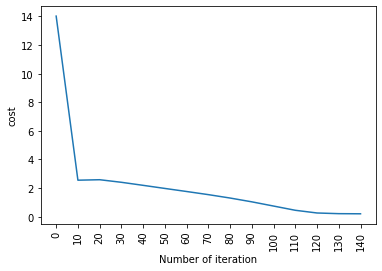

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [203]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update_learning_rate(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 150)  
    

In [204]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4096, 348)
(1, 348)
(4096, 62)
(1, 62)


In [205]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.967741935483871 
train accuracy: 1.0 


### Artificial Neural Network (ANN)

***Why it is called hidden:*** Because hidden layer does not see inputs(training set)

Have to spend time to choose number of hidden layer and the nodes of each layer.One things when number of hidden layer and node incese it takes too much time. Main thing in deep learning is that atleast one hidden layer must be exist...
some possible thing happened is that:
 * Input and output always remain same.
 * Hidden layer Relu always best.(logistic,tanh, softmax could vanish the gradient).Relu have not        vansishing problem but it have dead and saturated proble.(tanh increase non linearity)
 * adam optimizer is best algorithm for training network. 
 * output layer sigmod/ softmax.
 * In case of RRN the better activation function is tanh.
 * If weight large then  gradient is too close to 0 then optimization algo slow.
 ****
 **Drop-Out**: Its basically prevent network from overfiting. Dropout basically reduce the thinking capability in the time of training.

**Regularization** Its used to control overfiting more precisely high variance.
  * Lasso (L1)
  * Ridge (L2)

**Prevent Under Fiting**
 * Remove data complexity
 * Increase Complexiity on data.
 * Incease number of epoches.

In [206]:
# intialize parameters and layer sizes
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

In [207]:
# weight = np.random.randn(3, 3)*0.1
# weight
# bias = np.zeros((3,1))
# bias
# x_train.shape

In [208]:
def forward_propagation_NN(x_train, parameters):
    Z1 = np.dot(parameters["weight1"], x_train) + parameters["bias1"]  #input layer output
    A1 = np.tanh(Z1)  #tanh activation function here we used
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]   #output of hidden layer
    A2 =sigmoid(Z2)
    
    cache ={"Z1" :Z1,
            "A1" :A1,
            "Z2" :Z2,
            "A2" :A2,
    }
    return A2, cache

In [209]:
#here used cross_entropy as cost function
def compute_cost(A2,Y, paramaters):
    logprobs = -np.multiply(np.log(A2),Y)    #check losss then cost 
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

In [210]:
# Now time to backward propagation

def back_propagation_NN(parameters, cache, X,Y):
    dZ2 = cache["A2"]-Y
    dW2 =np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2=np.sum(dZ2, axis=1, keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters['weight2'].T,dZ2)*(1-np.power(cache["A1"],2))
    dW1 = np.dot(dZ1, X.T)/X.shape[1]
    db1 =np.sum(dZ1, axis=1, keepdims=True)/X.shape[1]   #keepdims??? see bellow
    grads ={ "dweight1" : dW1,
            "dbias1" :db1,
            "dweight2" :dW2,
            "dbias2" :db2,
    }
    return grads

Basically, After column sum it transfer into row and keep it into column we used keepdims=True.(shape have to same)

In [22]:
# keepdims
a=np.arange(12).reshape(3,4)  
a1=a.sum(axis=1)   #axis=1 mean column and 0 mean row
print(a, a1)


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] [ 6 22 38]


In [24]:
keepdims=a.sum(axis=1, keepdims=True)  
keepdims

array([[ 6],
       [22],
       [38]])

In [211]:
# Now update the parameter to chaange the output
def update_parameter(parameters, grads, learning_rate =0.01):
    parameters ={"weight1" : parameters["weight1"]-learning_rate*grads["dweight1"],
                 "bias1" :parameters["bias1"]-learning_rate *grads["dbias1"],
                 "weight2" :parameters["weight2"] - learning_rate*grads["dweight2"],
                 "dbias2" : parameters["bias2"] - learning_rate*grads["dbias2"]
    }
    return parameters

In [212]:
#prediction the result 
def prediction_NN(parameters, x_test):
    A2, cache = forward_propagation(x_test, parameters)
    y_prediction = np.zeros(1, x_test.shape[1])
    
    for i in range(A2.shape[1]):
        if A2[0,i] <= 0.5:
            y_prediction=0
        else:
            y_prediction=1
    return y_prediction

Cost after iteration 0: 0.334094
Cost after iteration 100: 0.351116
Cost after iteration 200: 0.326555
Cost after iteration 300: 0.279270
Cost after iteration 400: 0.232682
Cost after iteration 500: 0.195515
Cost after iteration 600: 0.195526
Cost after iteration 700: 0.174250
Cost after iteration 800: 0.133496
Cost after iteration 900: 0.116349
Cost after iteration 1000: 0.112736
Cost after iteration 1100: 0.094514
Cost after iteration 1200: 0.086314
Cost after iteration 1300: 0.079408
Cost after iteration 1400: 0.073484
Cost after iteration 1500: 0.068268
Cost after iteration 1600: 0.063560
Cost after iteration 1700: 0.059350
Cost after iteration 1800: 0.055756
Cost after iteration 1900: 0.052733
Cost after iteration 2000: 0.050108
Cost after iteration 2100: 0.047720
Cost after iteration 2200: 0.045410
Cost after iteration 2300: 0.042958
Cost after iteration 2400: 0.039930


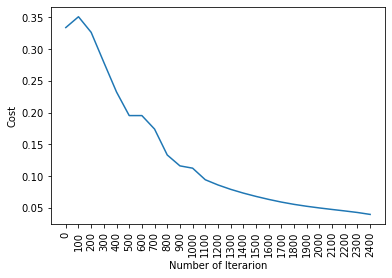

train accuracy: 99.42528735632185 %
test accuracy: 93.54838709677419 %


In [213]:
#now create model 
        
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters
parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)

##### Same dataset but wanna Explore with library 

In [173]:
X =np.load('C:\\Users\\gazur\\Desktop\\Related Content\\M-Model(dataset/X.npy')
Y =np.load('C:\\Users\\gazur\\Desktop\\Related Content\\M-Model(dataset/y.npy')

In [174]:
y.shape

(2062, 10)

In [175]:
X = np.concatenate((X[204:409], X[822:1027] ), axis=0) # from 0 to 204 is zero sign and from 205 to 410 is one sign 
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


In [176]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test=train_test_split(X,Y, test_size=.20, random_state=0)

In [177]:
x_train_flatten=x_train.shape[0]
x_test_flatten = x_test.shape[0]

x_train = x_train.reshape(x_train_flatten, x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape (x_test_flatten, x_test.shape[1]*x_test.shape[2])
x_train.shape

(328, 4096)

### Implement with keras with same data

In [178]:
#reshaping the data
# x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

In [179]:
print(x_train.shape)

(328, 4096)


In [180]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.callbacks import EarlyStopping

In [181]:
#data have to standarzition before apply the model
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [182]:
model = Sequential()

In [183]:
# 1st Layer
model.add(Dense(units=8, input_shape=(x_train.shape[1],)))
# model.add(BatchNormalization())
model.add(Activation("relu"))
# model.add(Dropout(0.2))

In [184]:
# 2nd_layer
model.add(Dense(units=4,use_bias=True))   #hidden layer
# model.add(BatchNormalization())
model.add(Activation('relu'))
# model.add(Dropout(0.2))

In [185]:
x_train.shape[1]

4096

**Note** : Important to define the input and hidden layer node. Becasue it also called  accuracy parameter.  

In [186]:
# layer 4  (here units value depend on y.shape parameter)
model.add(Dense(units=1, activation='sigmoid'))   #worst accuracy by softmax
#sigmoid used for binary classification and softmax used for multple classification

In [187]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [188]:
model.fit(x_train,y_train,validation_split=0.15, epochs=100)

Train on 278 samples, validate on 50 samples
Epoch 1/100
278/278 [==============================] - 0s 496us/step - loss: 0.6063 - accuracy: 0.6978 - val_loss: 0.4968 - val_accuracy: 0.9000
Epoch 2/100
278/278 [==============================] - 0s 97us/step - loss: 0.4510 - accuracy: 0.8813 - val_loss: 0.4227 - val_accuracy: 0.9400
Epoch 3/100
278/278 [==============================] - 0s 112us/step - loss: 0.4000 - accuracy: 0.9065 - val_loss: 0.3712 - val_accuracy: 0.9400
Epoch 4/100
278/278 [==============================] - 0s 101us/step - loss: 0.3509 - accuracy: 0.9568 - val_loss: 0.3575 - val_accuracy: 0.9800
Epoch 5/100
278/278 [==============================] - 0s 108us/step - loss: 0.3073 - accuracy: 0.9748 - val_loss: 0.3295 - val_accuracy: 0.9600
Epoch 6/100
278/278 [==============================] - 0s 108us/step - loss: 0.2699 - accuracy: 0.9892 - val_loss: 0.3141 - val_accuracy: 0.9400
Epoch 7/100
278/278 [==============================] - 0s 112us/step - loss: 0.2208 - 

278/278 [==============================] - 0s 76us/step - loss: 0.0316 - accuracy: 1.0000 - val_loss: 0.4152 - val_accuracy: 0.9800
Epoch 58/100
278/278 [==============================] - 0s 86us/step - loss: 0.0314 - accuracy: 1.0000 - val_loss: 0.4171 - val_accuracy: 0.9800
Epoch 59/100
278/278 [==============================] - 0s 83us/step - loss: 0.0313 - accuracy: 1.0000 - val_loss: 0.4183 - val_accuracy: 0.9800
Epoch 60/100
278/278 [==============================] - 0s 83us/step - loss: 0.0311 - accuracy: 1.0000 - val_loss: 0.4196 - val_accuracy: 0.9800
Epoch 61/100
278/278 [==============================] - 0s 68us/step - loss: 0.0310 - accuracy: 1.0000 - val_loss: 0.4211 - val_accuracy: 0.9800
Epoch 62/100
278/278 [==============================] - 0s 72us/step - loss: 0.0308 - accuracy: 1.0000 - val_loss: 0.4225 - val_accuracy: 0.9800
Epoch 63/100
278/278 [==============================] - 0s 76us/step - loss: 0.0307 - accuracy: 1.0000 - val_loss: 0.4243 - val_accuracy: 0.980

In [168]:
accuracy = model.evaluate(x_test,y_test)
print("Accuracy Variance : {}" .format(accuracy[0]))
print("Accuracy is : {}" .format(accuracy[1]))

413/413 [==============================] - 0s 39us/step
Accuracy Variance : 0.38450119014802336
Accuracy is : 0.9050847291946411
